In [2]:
import numpy as np 
import pandas as pd 
from ase import Atoms
import ase.visualize
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import csv_import
import os

sns.set()
sns.set_style("whitegrid")

train_bonds = csv_import.train_bonds
test_bonds = csv_import.test_bonds
test_charges = csv_import.test_charges
train_charges = csv_import.train_charges

In [3]:
def bond_type_to_pair(bond_type):
    # Input bond type and return last 3
    return bond_type[3:]


def bond_type_to_n(bond_type):
    return bond_type[0:3]


Bond types:  ['1.0CH' '1.0HN' '1.0HO' '3.0CN' '1.0CC' '1.0CO' '3.0CC' '2.0CO' '1.0CN'
 '1.0NO' '2.0CN' '2.0CC' '1.0NN' '2.0NN' '1.5CO' '1.0CF' '2.0NO']


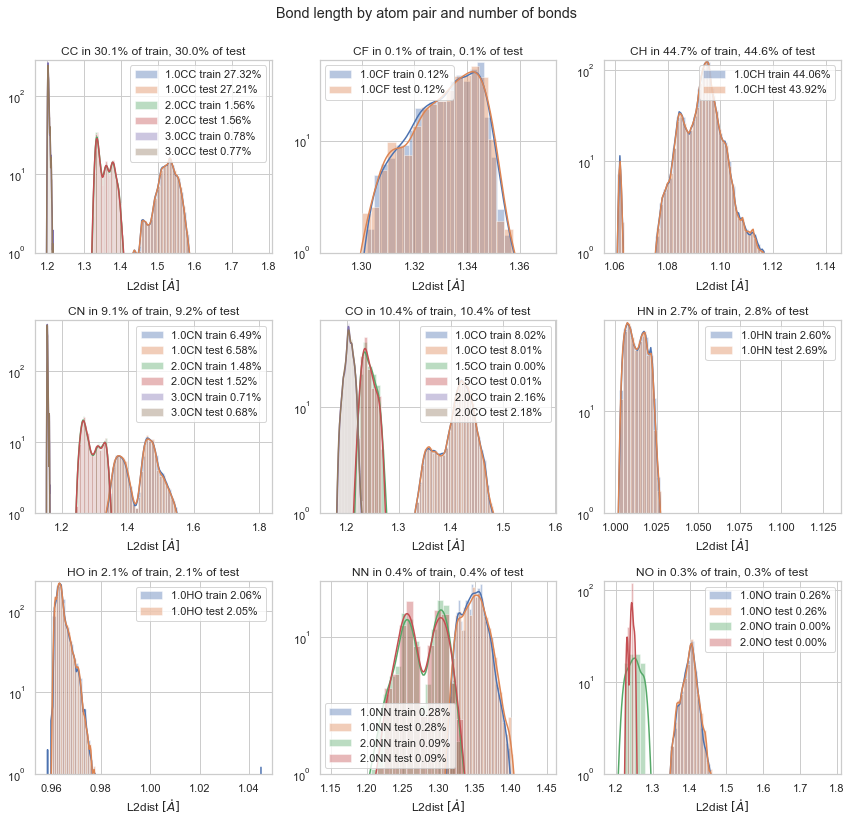

In [16]:
fig = plt.figure(figsize=(12,12))
bond_types = train_bonds.bond_type.unique()
unique_pairs = sorted({bond_type_to_pair(b):1 for b in bond_types}.keys())
print("Bond types: ", bond_types)
for (i, pair) in enumerate(unique_pairs):
    ax = fig.add_subplot(3, 3, i + 1)
    
    for bond_type in sorted([b for b in bond_types if pair == bond_type_to_pair(b)]):
        for (df, name) in [(train_bonds, "train"), (test_bonds, "test")]:          
            errors = df[(df.bond_type == bond_type) & (df.error == 1)].L2dist.values
            #if len(errors) > 0:
            #    sns.distplot(errors, color="red", kde=True)
                
            selection = df[(df.bond_type == bond_type) & (df.error == 0)].L2dist.values
            sns.distplot(selection, label=f"{bond_type} {name} {len(selection)/len(df)*100:.2f}%", kde=True, ax=ax)
            
    ax.set_ylim(1, ax.get_ylim()[1])
    ax.set_yscale('log')
    ax.set_xlabel("L2dist $[\mathring{A}]$")
    ratio_tr  = (train_bonds.bond_type.apply(bond_type_to_pair) == pair).sum() / len(train_bonds)
    ratio_tst = (test_bonds.bond_type.apply(bond_type_to_pair) == pair).sum() / len(test_bonds)
    ax.set_title(f"{pair} in {ratio_tr*100:.1f}% of train, {ratio_tst*100:.1f}% of test")
    ax.legend()
fig.suptitle("Bond length by atom pair and number of bonds")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [3]:
print(f"Failed molecules ratio in test set = {test_bonds.groupby('molecule_name')['error'].max().sum() / len(test_bonds.molecule_name.unique()):0.3f}")
print(f"Failed molecules ratio in train set = {train_bonds.groupby('molecule_name')['error'].max().sum() / len(train_bonds.molecule_name.unique()):0.3f}")

test_nionized = test_charges.groupby('molecule_name')['charge'].apply(lambda arr: (arr.values != 0).max()).sum()
print(f"Ionized molecules ratio in test set = {test_nionized/len(test_bonds.molecule_name.unique()):0.3f}")

train_nionized = train_charges.groupby('molecule_name')['charge'].apply(lambda arr: (arr.values != 0).max()).sum()
print(f"Ionized molecules ratio in train set = {train_nionized/len(train_bonds.molecule_name.unique()):0.3f}")

print(f"{len(test_bonds.molecule_name.unique())} unique molecules in test set")
print(f"{len(train_bonds.molecule_name.unique())} unique molecules in train set")

Failed molecules ratio in test set = 0.025
Failed molecules ratio in train set = 0.024
Ionized molecules ratio in test set = 0.001
Ionized molecules ratio in train set = 0.001
45772 unique molecules in test set
85003 unique molecules in train set


In [7]:
bond_types = train_bonds.bond_type.unique()
unique_pairs = sorted({bond_type_to_pair(b):1 for b in bond_types}.keys())
print("Bond types: ", bond_types)
all_error = pd.DataFrame()

for (i, pair) in enumerate(unique_pairs):
    for bond_type in sorted([b for b in bond_types if pair == bond_type_to_pair(b)]):
        for (df, name) in [(test_bonds, 'test_errors')]:
            errors = df[(df.bond_type == bond_type) & (df.error == 1)]
            all_error = all_error.append(errors)
        

all_error.to_csv('resources/test_errors.csv', index=False)
print(all_error)

Bond types:  ['1.0CH' '1.0HN' '1.0HO' '3.0CN' '1.0CC' '1.0CO' '3.0CC' '2.0CO' '1.0CN'
 '1.0NO' '2.0CN' '2.0CC' '1.0NN' '2.0NN' '1.5CO' '1.0CF' '2.0NO']
           molecule_name  atom_index_0  atom_index_1  nbond    L2dist  error  \
591     dsgdb9nsd_000204             0             1    1.0  1.490985      1   
592     dsgdb9nsd_000204             1             2    1.0  1.355234      1   
603     dsgdb9nsd_000206             1             2    1.0  1.375437      1   
624     dsgdb9nsd_000208             1             2    1.0  1.360776      1   
634     dsgdb9nsd_000210             1             2    1.0  1.371392      1   
...                  ...           ...           ...    ...       ...    ...   
845667  dsgdb9nsd_131991             6             8    1.0  1.219024      1   
845673  dsgdb9nsd_131998             0             1    1.0  1.215371      1   
845674  dsgdb9nsd_131998             1             2    1.0  1.215999      1   
850971  dsgdb9nsd_133315             6          

Bond types:  ['1.0CH' '1.0HN' '1.0HO' '3.0CN' '1.0CC' '1.0CO' '3.0CC' '2.0CO' '1.0CN'
 '1.0NO' '2.0CN' '2.0CC' '1.0NN' '2.0NN' '1.5CO' '1.0CF' '2.0NO']
